<a href="https://colab.research.google.com/github/shannonlal/Statistical-YCBS-255/blob/main/Workbook_03_handout_W2021_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3: Introduction to Classification Methods
## Pre-Class Activity
### Watch
1. [StatQuest: Logistic Regression](https://www.youtube.com/watch?v=yIYKR4sgzI8)
2. For more detailed version try
   + [Logistic Regression Details Pt1: Coefficients
](https://www.youtube.com/watch?v=vN5cNN2-HWE) 
   + [Logistic Regression Details Pt 2: Maximum Likelihood
   ](https://www.youtube.com/watch?v=BfKanl1aSG0)
   +[Logistic Regression Details Pt 3: $R^2$ and $p$-value
](https://www.youtube.com/watch?v=xxFYro8QuXA)
3. [A visual guide to Bayesian thinking
](https://www.youtube.com/watch?v=BrK7X_XlGB8)
4. [StatQuest: Maximum Likelihood, clearly explained!!!
](https://www.youtube.com/watch?v=XepXtl9YKwc)
5. [StatQuest: Probability vs Likelihood
](https://www.youtube.com/watch?v=pYxNSUDSFH4)

Instruction for using Colab: [Here](https://www.tutorialspoint.com/google_colab/google_colab_quick_guide.htm)

# Classification

Here we focus on three classifiers: logistic regression, linear discriminant, and quadratic discriminant analysis. We will apply each classifier in two steps:

- When there is only one predictor.
- When there are two or more predictors.

## Import Needed Libraries 

In [1]:
import numpy as np
import pandas as pd
from pylab import rcParams
import seaborn as sb 
from sklearn.preprocessing import scale
from collections import Counter

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

## Load Data
Load the data set as follows:
1. Download the file (`Default.csv`) and save it into your computer; Location: mycourses/Content/Data.
2. Run the following cell and **immediately** (before the small turning icon on the left side of the cell stops turning) click on `Choose Files` appeared underneath the cell.
3. Navigate to the location you have saved the data and open it.

Or:

1. Use the 'Files' options on the right hand side menu to upload the file in the Workspace.

If Jupyter notebook is used, then for excel/csv files pandas library is used
(pandas function `pd.read_csv`)

In [ ]:
# If you work with COLAB:
from google.colab import files
uploaded = files.upload()

# Else
# import os
# cwd = os.getcwd()
# file_path = cwd + '\\Default.xlsx'
# default_data = pd.read_excel(file_path)

In [ ]:
# default_data = pd.read_excel('Default.xls')
default_data = pd.read_csv('Default.csv')

default_data.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947
3,4,No,No,529.250605,35704.493935
4,5,No,No,785.655883,38463.495879


In [ ]:
default_data = default_data.drop(['Unnamed: 0'], axis=1)

In [ ]:
default_data.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


##  Factorize
Machine learning algorithms cannot function with string variables. We need to transform 'Yes' and 'No' to some numerical values. For binary variables it is convenient to transform the categories to zero and one. Let's transform 'No' to zero and 'Yes' to one before going further.

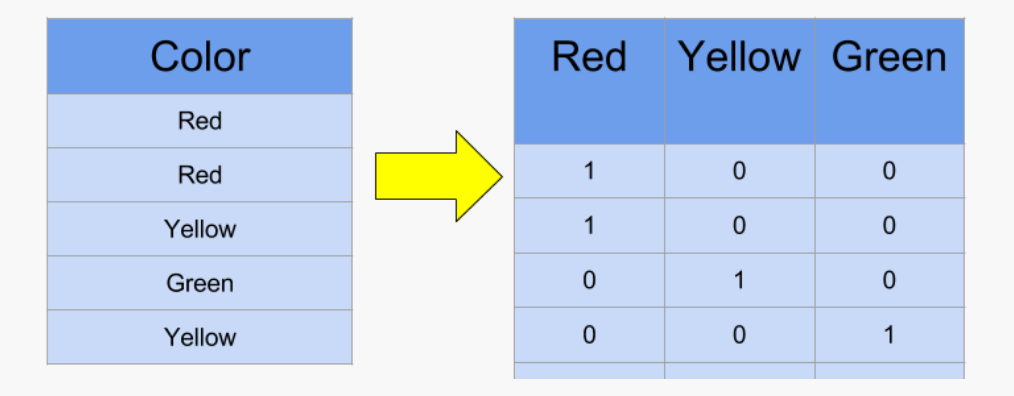

#### Remember to remove one of the columns generated when you perform one-hot encoding. Why? 

Hint: linear dependence

In [ ]:
default_data.default.factorize()

(array([0, 0, 0, ..., 0, 0, 0]), Index(['No', 'Yes'], dtype='object'))

In [ ]:
default_data['default_factor'] = default_data.default.factorize()[0]
default_data['student_factor'] = default_data.student.factorize()[0]

default_data.head(3)

,default,student,balance,income,default_factor,student_factor
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0


In [ ]:
default_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   default         10000 non-null  object 
 1   student         10000 non-null  object 
 2   balance         10000 non-null  float64
 3   income          10000 non-null  float64
 4   default_factor  10000 non-null  int64  
 5   student_factor  10000 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 468.9+ KB


In [ ]:
default_data.head()

,default,student,balance,income,default_factor,student_factor
0,No,No,729.526495,44361.625074,0,0
1,No,Yes,817.180407,12106.134700,0,1
2,No,No,1073.549164,31767.138947,0,0
3,No,No,529.250605,35704.493935,0,0
4,No,No,785.655883,38463.495879,0,0


## Logistic Regression
Here we predict the default status 'No'=0 or 'Yes' only based on credit balance.

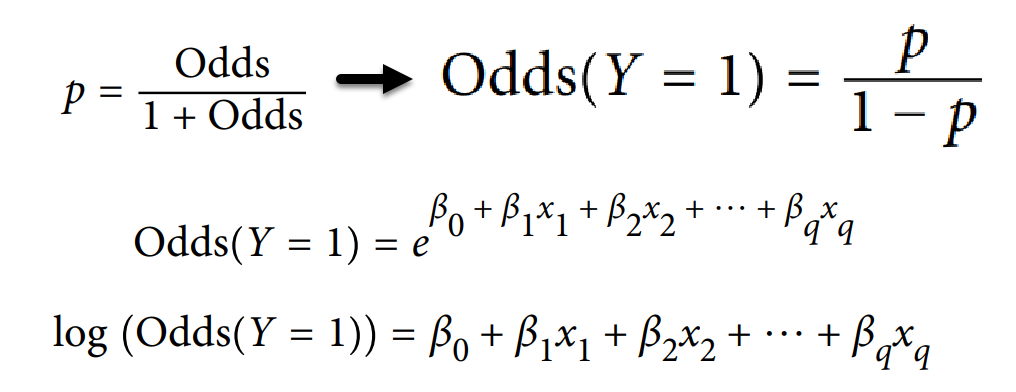

In [ ]:
# Make sure you feed the data in the right shape  
from sklearn.linear_model import LogisticRegression

X = default_data[['balance']]
y = default_data['default_factor']

lr = LogisticRegression()
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(lr.intercept_)
print(lr.coef_)

[-10.65132824]
[[0.00549892]]


The model is defined as $\text{log}\Big(\frac{\pi}{1-\pi}\Big)=\beta_{0}+\beta_{1}\text{Balance}$. What is the probability of default for someone with 1000 dollars in balance?

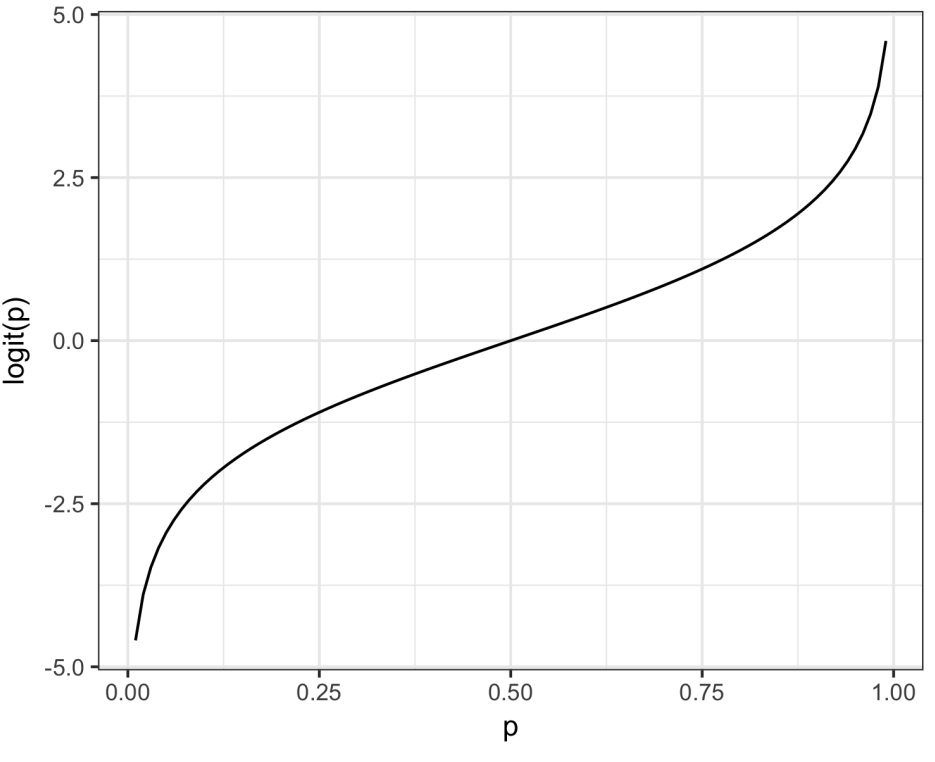

In [ ]:
right_side = lr.intercept_ + 1000*lr.coef_[0]
prob_survival = np.exp(right_side)/(1+np.exp(right_side))

In [ ]:
prob_survival

array([0.00575215])

In [ ]:
X_pred = np.linspace(start = 0, stop = 3000, num = 100).reshape(-1,1)
y_pred = lr.predict_proba(X_pred)

X_pred.shape

(100, 1)

In [ ]:
y_pred = (1+np.exp(-(lr.intercept_ + lr.coef_*X_pred)))**(-1)

y_pred.shape

(100, 1)

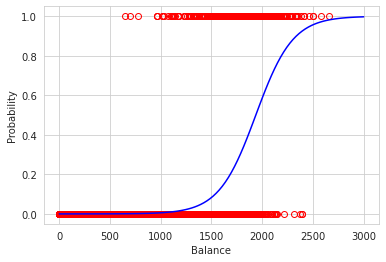

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X, y, 'or', mfc='none');
plt.plot(X_pred, y_pred[:,0], '-b');
plt.xlabel('Balance');
plt.ylabel('Probability');

In [ ]:
# Let's see how precise the predictor is
from sklearn.metrics import confusion_matrix
y_pred = lr.predict(X)
conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[9625,   42],
       [ 233,  100]])

[sklearn-Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

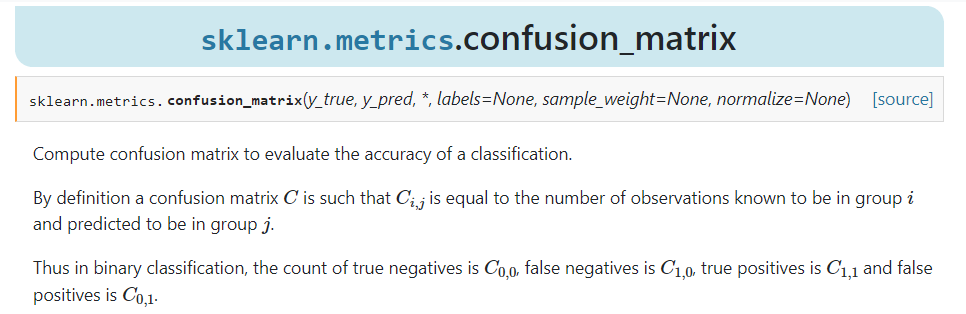

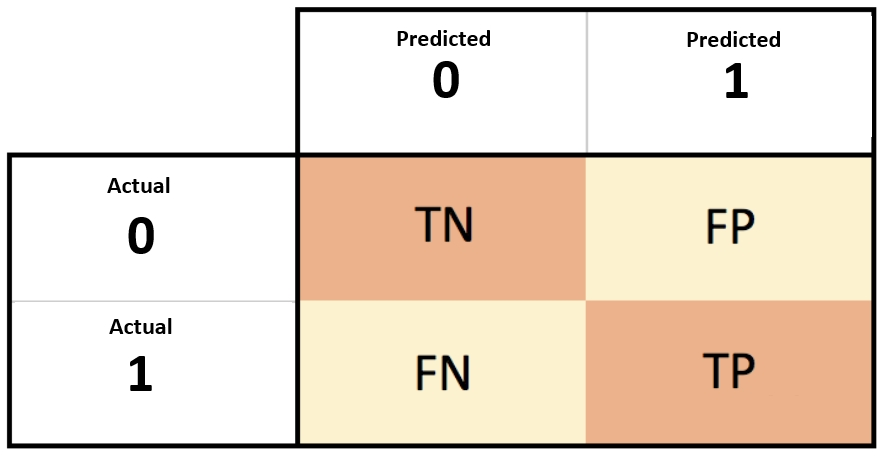

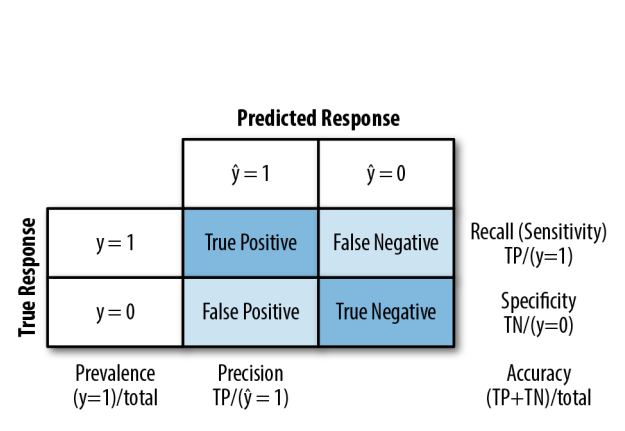

In [ ]:
# Calculate accuracy.
np.trace(conf_matrix)/np.sum(conf_matrix)

0.9725

## Linear Discriminant Analysis
Linear discriminant analysis (lda) is one of the most popular classifiers.


#### Covariance

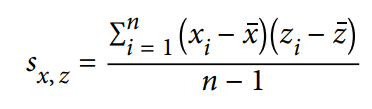

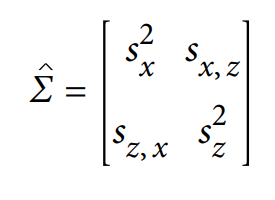

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = default_data[['balance']]
y = default_data['default_factor']
lda = LinearDiscriminantAnalysis()
lda.fit(X,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [ ]:
import numpy as np
X_pred = np.array([1500, 2000]).reshape(2,1)
print(X_pred)
print(lda.predict_proba(X_pred))

[[1500]
 [2000]]
[[0.9119783  0.0880217 ]
 [0.50986471 0.49013529]]


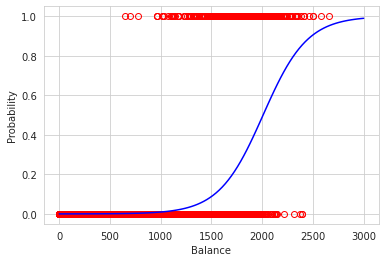

In [ ]:
import matplotlib.pyplot as plt
X_pred = np.linspace(start = 0, stop = 3000, num= 100).reshape(-1,1)
y_pred = lda.predict_proba(X_pred)
plt.plot(X, y, 'or', mfc='none')
plt.plot(X_pred, y_pred[:,1], '-b')
plt.xlabel('Balance')
plt.ylabel('Probability');

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = lda.predict(X)
conf_mat = confusion_matrix(y, y_pred)

In [ ]:
conf_mat

array([[9643,   24],
       [ 257,   76]])

In [ ]:
# Calculate accuracy.
np.trace(conf_mat)/np.sum(conf_mat)

0.9719

## Quadratic Discriminant Analysis
Quadratic discriminant functions the same as the linear discriminant. Here we only repeat the codes above.

https://scikit-learn.org/stable/auto_examples/classification/plot_lda_qda.html#sphx-glr-auto-examples-classification-plot-lda-qda-py


Automatically created module for IPython interactive environment


<Figure size 720x576 with 0 Axes>

Text(0.5, 0.98, 'Linear Discriminant Analysis vs Quadratic Discriminant Analysis')

(-2.8192269094900317,
 3.581192918644006,
 -0.988703625549599,
 1.9187274256945348)

(-2.8192269094900317,
 3.581192918644006,
 -0.988703625549599,
 1.9187274256945348)

(-16.595364457585553, 13.42691758130466, -12.061998025611562, 21.652657710667)

(-16.595364457585553, 13.42691758130466, -12.061998025611562, 21.652657710667)

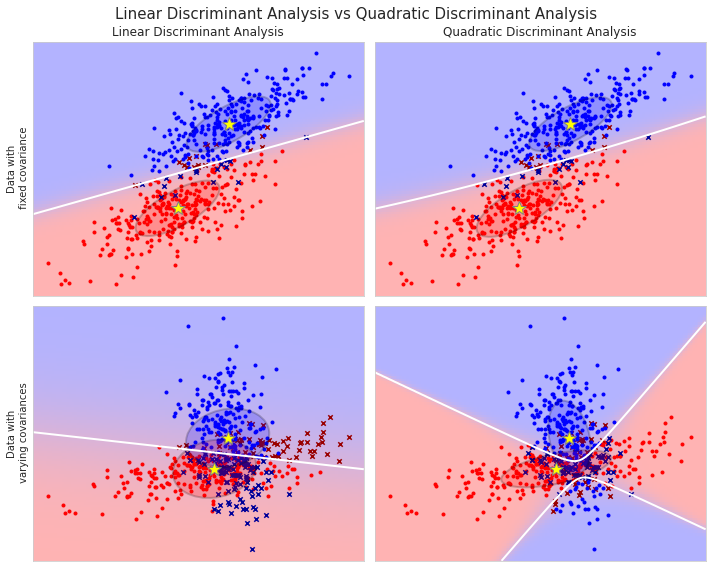

In [ ]:

print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()



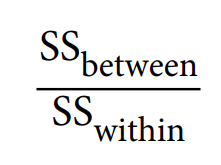

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# Make sure you feed the data in the right shape  
X = default_data[['balance']]
y = default_data['default_factor']
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,y)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [ ]:
X_pred = np.array([1500, 2000]).reshape(-1,1)
print(qda.predict_proba(X_pred))

[[0.89830669 0.10169331]
 [0.47945471 0.52054529]]


In [ ]:
y_pred = qda.predict(X)
confusion_matrix(y, y_pred)

array([[9639,   28],
       [ 246,   87]])

In [ ]:
y_pred = (qda.predict_proba(X)[:,1]>0.03)*1
confusion_matrix(y, y_pred)

array([[8139, 1528],
       [  29,  304]])

In [ ]:
# Calculate accuracy.
np.trace(conf_mat)/np.sum(conf_mat)

0.9719

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

### Multiple Predictors
Fitting the logistic regression with two predictors is very similar to simple version. Just feed the appropriate matrix X.

In [ ]:
X = default_data[['balance', 'income']]
y = default_data['default_factor']

lr2 = LogisticRegression()
lr2.fit(X, y)

print('\n Intercept: ', lr2.intercept_)
print('Coefficients: ', lr2.coef_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


 Intercept:  [-11.54047812]
Coefficients:  [[5.64710797e-03 2.08091985e-05]]


In [ ]:
X_pred = np.array([1500, 20000, 1500, 25000]).reshape(2,2)
print(X_pred)
print(lr2.predict_proba(X_pred))

[[ 1500 20000]
 [ 1500 25000]]
[[0.93423451 0.06576549]
 [0.92754571 0.07245429]]


In [ ]:
X = default_data[['balance', 'income', 'student_factor']]
y = default_data['default_factor']

lr3 = LogisticRegression()
lr3.fit(X, y)

print('\n Intercept: ', lr3.intercept_)
print('Coefficients: ', lr3.coef_)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


 Intercept:  [-2.9508496]
Coefficients:  [[ 4.08201022e-03 -1.33893466e-04 -3.89009045e+00]]


In [ ]:
X = default_data[['balance', 'income', 'student_factor']]
y = default_data['default_factor']

lr4 = LogisticRegression(C=1e42)
lr4.fit(X, y)

print('\n Intercept: ', lr4.intercept_)
print('Coefficients: ', lr4.coef_)


LogisticRegression(C=1e+42, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


 Intercept:  [-3.01893511]
Coefficients:  [[ 4.16320944e-03 -1.34958487e-04 -3.97984710e+00]]


The response is *Default* which takes a value of 0 if the loan is paid off or 1 if the loan defaults. The feature *income* has a coeff which is negative. This means that a person with higher income has a less probability of *Deafult*ing on the loan. Similarly, the feature *student_factor* has a negative coefficient which means a student can get higher education and has the ability to pay off the loan.

#### Why deal with odds ratio

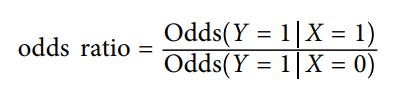

## Logistic Regression with statsmodels
Always statsmodels provides more statistical details. Let's try fitting logistic regression with statsmodels

In [ ]:
import statsmodels.api as smf
lr = smf.Logit.from_formula(formula = "default_factor~balance+income", 
                            data= default_data).fit()

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


In [ ]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         default_factor   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Oct 2020   Pseudo R-squ.:                  0.4594
Time:                        00:15:09   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                4.541e-292
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -11.5405      0.435    -26.544      0.000     -12.393     -10.688
balance        0.0056      0.000     24.835      0.000       0.005       0.006
income      2.081e-05   4.99e-06      4.174      0.000     1.1e-05    3.06e-05
==============================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Naive Bayes (Mini Example)
Using `scikit-learn` library we will build a *Naive Bayes* model. Under this library there are three types of Naive Bayes models:

+ **Gaussian:** It is used in classification and it assumes that features follow a normal distribution.
+ **Multinomial:** It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.
+ **Bernoulli:** The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

Based on your data set, you can choose any of above discussed model. Below is the example of Gaussian model.

In [ ]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

In [ ]:
#assigning predictor and target variables
x= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
Y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])
x
Y

array([[-3,  7],
       [ 1,  5],
       [ 1,  2],
       [-2,  0],
       [ 2,  3],
       [-4,  0],
       [-1,  1],
       [ 1,  1],
       [-2,  2],
       [ 2,  7],
       [-4,  1],
       [-2,  7]])

array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [ ]:
#Create a Gaussian Classifier
model = GaussianNB()

In [ ]:
# Train the model using the training sets 
model.fit(x, Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Predict Output for [1,2] and [3,4] 
predicted= model.predict([[1,2],[3,4]])
print (predicted)

[3 4]


In [ ]:
# Predict output of the training set 
model.predict(x)

array([4, 4, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4])

In [ ]:
# Train set performance (Accuracy)
model.score(x, Y)

0.6666666666666666

# Practice

1. Load '**house_sales**' dataset on mycourses: mycourses\Content\Data\house_small.csv
2. In today's class you will only be working with the following features/columns of the dataset

    *   Sq_Ft_Tot_Living
    *   Sq_Ft_Lot
    *   Bathroom_count
    *   Bedroom_count
    *   Bldg_Grade
    *   House_Sale_Price

      * Remove all the columns that you do not want	

3. Print out the first 10 records and last 5 records/rows of your dataframe.

4. Display datatype associated with the above set of features.
  * Do you notice something wrong?

5. After making proper modification, generate stats associated with all the columns.

6. Train a model with '**House_Sale_Price**' as the target. Use the most appropriate model that you have learnt.

7. Check model performance on the data. (R^2, MSE)

8. Add additional features, based on what you already have.
    *   Create columns which is squared of 
        * Sq_Ft_Tot_Living
        * Sq_Ft_Lot
        * Bedroom_count

9. Train again with all the features (origional + generated) and check teh performance.
  * Do you see an improvement in performance?






In [2]:
import pandas as pd

In [3]:
from google.colab import files
uploaded = files.upload()

Saving house_small.csv to house_small.csv


In [12]:
df = pd.read_csv( 'house_small.csv')

df_clean = df[['Sq_Ft_Tot_Living','Sq_Ft_Lot', 'Bathroom_count', 'Bedroom_count', 'Bldg_Grade', 'House_Sale_Price']]
df_clean.head()


,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,House_Sale_Price
0,2400,9373,3.00,6,7,300805.0
1,3764,20156,3.75,4,10,1076162.0
2,2060,26036,1.75,4,8,761805.0
3,3200,8618,3.75,5,7,442065.0
4,1720,8620,1.75,4,7,297065.0


In [13]:
df_clean.tail(5)

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,House_Sale_Price
22684,1480,5468,1.75,3,7,443803.0
22685,4720,23914,4.50,4,11,1586196.0
22686,1070,11170,1.00,4,6,220744.0
22687,1345,6223,2.00,3,7,342207.0
22688,790,4400,1.50,3,7,475489.0


In [14]:
df_clean.dtypes

Sq_Ft_Tot_Living      int64
Sq_Ft_Lot             int64
Bathroom_count      float64
Bedroom_count         int64
Bldg_Grade            int64
House_Sale_Price    float64
dtype: object

In [16]:
df_clean.describe()

,Sq_Ft_Tot_Living,Sq_Ft_Lot,Bathroom_count,Bedroom_count,Bldg_Grade,House_Sale_Price
count,22689.000000,2.268900e+04,22689.000000,22689.000000,22689.000000,2.268900e+04
mean,2080.258275,1.174621e+04,2.176550,3.367843,7.680991,5.652523e+05
std,913.791565,2.901475e+04,0.768044,0.904414,1.180565,3.854195e+05
min,370.000000,4.940000e+02,0.000000,0.000000,3.000000,3.368000e+03
25%,1420.000000,4.800000e+03,1.750000,3.000000,7.000000,3.605630e+05
50%,1910.000000,7.200000e+03,2.250000,3.000000,7.000000,4.713150e+05
75%,2540.000000,9.794000e+03,2.500000,4.000000,8.000000,6.494430e+05
max,10740.000000,1.024068e+06,8.000000,33.000000,13.000000,1.164486e+07


In [17]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22689 entries, 0 to 22688
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sq_Ft_Tot_Living  22689 non-null  int64  
 1   Sq_Ft_Lot         22689 non-null  int64  
 2   Bathroom_count    22689 non-null  float64
 3   Bedroom_count     22689 non-null  int64  
 4   Bldg_Grade        22689 non-null  int64  
 5   House_Sale_Price  22689 non-null  float64
dtypes: float64(2), int64(4)
memory usage: 1.0 MB


In [29]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


lr.fit( X = df_clean[['Sq_Ft_Tot_Living', 'Sq_Ft_Lot','Bathroom_count', 'Bedroom_count', 'Bedroom_count']][0:16000], y = df_clean['House_Sale_Price'][0:16000] )

print(lr.intercept_)
print(lr.coef_)

y_pred = lr.predict( df_clean[['Sq_Ft_Tot_Living', 'Sq_Ft_Lot','Bathroom_count', 'Bedroom_count', 'Bedroom_count']][16000:])

print( lr.score( df_clean[['Sq_Ft_Tot_Living', 'Sq_Ft_Lot','Bathroom_count', 'Bedroom_count', 'Bedroom_count']][16000:], df_clean['House_Sale_Price'][16000:] ))


LinearRegression()

87447.60604170809
[ 3.37125153e+02 -1.50998385e-01  1.16681367e+04 -3.58671965e+04
 -3.58671965e+04]
0.4783087425207734


In [30]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print(mean_squared_error(df_clean['House_Sale_Price'][16000:], y_pred))
print(r2_score(df_clean['House_Sale_Price'][16000:], y_pred))

65637496779.18992
0.4783087425207734


## Assessing the model

Sample code:

In [15]:
from sklearn.metrics import r2_score, mean_squared_error

fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

NameError: ignored